In [3]:
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install Pillow langdetect scikit-learn

In [1]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from datetime import datetime, timedelta
# from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Authentication
consumerKey = "J2kKVsI7Qt5cFnMpyyWdawC32"
consumerSecret = "RP0g3dpzZIb7JKEGbW5Sn7as74KTVfhomUjZmi6xfoMLBE5pUW"
auth = tweepy.AppAuthHandler(consumerKey, consumerSecret)
api = tweepy.API(auth)

In [17]:
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

def save_tweets_in_csv(tweet_row):
    a_file = open("tweets.csv", "w")
    

keyword = "covid monoclonal antibody treatment"
today = datetime.now()
n_days_ago = today - timedelta(days=30)
dt_string = n_days_ago.strftime("%Y%m%d%H%M")
noOfTweet=3000

tweets = tweepy.Cursor(api.search_30_day, label="dev", query=keyword, fromDate=dt_string, maxResults=100).items(noOfTweet)
#tweets = tweepy.Cursor(api.search_tweets, q=keyword, lang="en", count=3000).items(100000)

tweet_rows = []
for tweet in tweets:
    tweet_rows.append(tweet)

TooManyRequests: 429 Too Many Requests
Request exceeds account’s current package request limits. Please upgrade your package and retry or contact Twitter about enterprise access.

In [58]:
import json
import csv

t = tweet_rows[0]
t_json = t._json
keys = list(json.loads(json.dumps(t_json)).keys())
keys.append('retweeted_status')
keys.append('quoted_status_id_str')
keys.append('quoted_status_permalink')
keys.append('quoted_status_id')
keys.append('quoted_status')
keys.append('extended_entities')

a_file = open("tweets.csv", "w", encoding="utf-8")
dict_writer = csv.DictWriter(a_file, keys)
dict_writer.writeheader()
data_frames = []

for t in tweet_rows:
    line = json.loads(json.dumps(t._json))
    data_frames.append(line)
    dict_writer.writerow(line)

a_file.close()


In [61]:
dfItem = pd.DataFrame.from_records(data_frames)
dfItem

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,possibly_sensitive,filter_level,lang,matching_rules,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_entities
0,Sat Feb 05 17:00:59 +0000 2022,1490007557691301900,1490007557691301900,Oral antivirals and monoclonal antibody treatm...,"[0, 140]","<a href=""https://www.hootsuite.com"" rel=""nofol...",True,NaN,None,NaN,...,False,low,en,[{'tag': None}],NaN,NaN,NaN,NaN,NaN,NaN
1,Sat Feb 05 15:56:53 +0000 2022,1489991426507259904,1489991426507259904,RT @DukeStateGovRel: Instead of coming into th...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,NaN,low,en,[{'tag': None}],{'created_at': 'Mon Jan 31 18:34:46 +0000 2022...,NaN,NaN,NaN,NaN,NaN
2,Sat Feb 05 15:53:09 +0000 2022,1489990485917765638,1489990485917765638,High risk for COVID &amp; monoclonal antibody ...,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,True,low,en,[{'tag': None}],NaN,NaN,NaN,NaN,NaN,NaN
3,Sat Feb 05 14:52:57 +0000 2022,1489975337509429255,1489975337509429255,@SarahAshtonLV @NVGOP @joeygilbertinc To clari...,"[38, 140]","<a href=""http://twitter.com/download/iphone"" r...",True,1.489035e+18,1489035393701924872,4.413817e+09,...,False,low,en,[{'tag': None}],NaN,NaN,NaN,NaN,NaN,NaN
4,Sat Feb 05 14:46:05 +0000 2022,1489973610022322181,1489973610022322181,DeSantis didn't tell the full story about evid...,NaN,"<a href=""https://crowdfireapp.com"" rel=""nofoll...",False,NaN,None,NaN,...,False,low,en,[{'tag': None}],NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Tue Jan 25 03:53:45 +0000 2022,1485823179645935620,1485823179645935620,According US Securities and Exchange Commissio...,NaN,"<a href=""http://twitter.com/download/android"" ...",True,NaN,None,NaN,...,False,low,en,[{'tag': None}],NaN,NaN,NaN,NaN,NaN,NaN
2496,Tue Jan 25 03:47:08 +0000 2022,1485821512087126017,1485821512087126017,@k_ovfefe2 I had covid in September and was bl...,"[11, 117]","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,1.485818e+18,1485818092030771202,1.228353e+18,...,NaN,low,en,[{'tag': None}],NaN,NaN,NaN,NaN,NaN,NaN
2497,Tue Jan 25 03:33:56 +0000 2022,1485818189716107264,1485818189716107264,RT @dxena2: @GovRonDeSantis #DeathSantis A 'tr...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,NaN,low,en,[{'tag': None}],{'created_at': 'Sat Jan 22 10:44:31 +0000 2022...,NaN,NaN,NaN,NaN,NaN
2498,Tue Jan 25 03:17:24 +0000 2022,1485814031143391237,1485814031143391237,RT @By_CJewett: The @US_FDA limited the emerge...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,NaN,low,en,[{'tag': None}],{'created_at': 'Mon Jan 24 23:35:08 +0000 2022...,NaN,NaN,NaN,NaN,NaN


In [62]:
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
rows = []
for tweet in tweet_rows:
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [63]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2500
positive number:  672
negative number:  786
neutral number:  1042


In [64]:
tweet_list

,0
0,Oral antivirals and monoclonal antibody treatm...
1,RT @DukeStateGovRel: Instead of coming into th...
2,High risk for COVID &amp; monoclonal antibody ...
3,@SarahAshtonLV @NVGOP @joeygilbertinc To clari...
4,DeSantis didn't tell the full story about evid...
...,...
2495,According US Securities and Exchange Commissio...
2496,@k_ovfefe2 I had covid in September and was bl...
2497,RT @dxena2: @GovRonDeSantis #DeathSantis A 'tr...
2498,RT @By_CJewett: The @US_FDA limited the emerge...


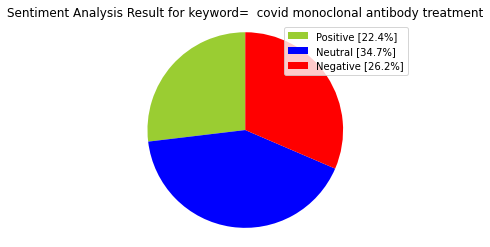

In [65]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [66]:
tweet_list.drop_duplicates(inplace = True)

In [67]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,Oral antivirals and monoclonal antibody treatm...,Oral antivirals and monoclonal antibody treatm...
1,RT @DukeStateGovRel: Instead of coming into th...,RT @DukeStateGovRel: Instead of coming into th...
2,High risk for COVID &amp; monoclonal antibody ...,High risk for COVID &amp; monoclonal antibody ...
3,@SarahAshtonLV @NVGOP @joeygilbertinc To clari...,@SarahAshtonLV @NVGOP @joeygilbertinc To clari...
4,DeSantis didn't tell the full story about evid...,DeSantis didn't tell the full story about evid...
...,...,...
2491,This just came on the news in South Florida. T...,This just came on the news in South Florida. T...
2492,RT @BToneVibes: @EricTopol @US_FDA @FT @kirans...,RT @BToneVibes: @EricTopol @US_FDA @FT @kirans...
2494,"Okay, so Gov. #DeathSantis shills for monoclon...","Okay, so Gov. #DeathSantis shills for monoclon..."
2495,According US Securities and Exchange Commissio...,According US Securities and Exchange Commissio...


In [68]:
tweet_list

,0,text
0,Oral antivirals and monoclonal antibody treatm...,Oral antivirals and monoclonal antibody treatm...
1,RT @DukeStateGovRel: Instead of coming into th...,RT @DukeStateGovRel: Instead of coming into th...
2,High risk for COVID &amp; monoclonal antibody ...,High risk for COVID &amp; monoclonal antibody ...
3,@SarahAshtonLV @NVGOP @joeygilbertinc To clari...,@SarahAshtonLV @NVGOP @joeygilbertinc To clari...
4,DeSantis didn't tell the full story about evid...,DeSantis didn't tell the full story about evid...
...,...,...
2491,This just came on the news in South Florida. T...,This just came on the news in South Florida. T...
2492,RT @BToneVibes: @EricTopol @US_FDA @FT @kirans...,RT @BToneVibes: @EricTopol @US_FDA @FT @kirans...
2494,"Okay, so Gov. #DeathSantis shills for monoclon...","Okay, so Gov. #DeathSantis shills for monoclon..."
2495,According US Securities and Exchange Commissio...,According US Securities and Exchange Commissio...


In [69]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,Oral antivirals and monoclonal antibody treatm...,oral antivirals and monoclonal antibody treatm...
1,RT @DukeStateGovRel: Instead of coming into th...,instead of coming into the hospital for treat...
2,High risk for COVID &amp; monoclonal antibody ...,high risk for covid amp monoclonal antibody ...
3,@SarahAshtonLV @NVGOP @joeygilbertinc To clari...,to clarify those initial monoclonal ant...
4,DeSantis didn't tell the full story about evid...,desantis didn t tell the full story about evid...
5,@RealBrettSears @rwpmlj @EricRWeinstein @Spoti...,the sad situation is that early trea...
6,@Marylynn320 @AlizaCortes1 @RandPaul The sad s...,the sad situation is that early treatmen...
7,@Jgbankers1 @RandPaul The sad situation is tha...,the sad situation is that early treatment ...
8,@Flamingoii1 @TruthJustis4USA @RandPaul The sa...,the sad situation is that early treatmen...
9,@3rdEyeWiseguy @tjb1964 @RandPaul The sad situ...,the sad situation is that early treatmen...


In [70]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Oral antivirals and monoclonal antibody treatm...,oral antivirals and monoclonal antibody treatm...,0.40,0.400000,positive,0.000,0.856,0.144,0.4019
1,RT @DukeStateGovRel: Instead of coming into th...,instead of coming into the hospital for treat...,0.00,0.000000,positive,0.000,0.887,0.113,0.3182
2,High risk for COVID &amp; monoclonal antibody ...,high risk for covid amp monoclonal antibody ...,0.08,0.303333,negative,0.130,0.870,0.000,-0.2732
3,@SarahAshtonLV @NVGOP @joeygilbertinc To clari...,to clarify those initial monoclonal ant...,0.00,0.000000,negative,0.158,0.842,0.000,-0.1280
4,DeSantis didn't tell the full story about evid...,desantis didn t tell the full story about evid...,0.35,0.550000,neutral,0.000,1.000,0.000,0.0000
5,@RealBrettSears @rwpmlj @EricRWeinstein @Spoti...,the sad situation is that early trea...,-0.20,0.650000,negative,0.279,0.721,0.000,-0.4767
6,@Marylynn320 @AlizaCortes1 @RandPaul The sad s...,the sad situation is that early treatmen...,-0.20,0.650000,negative,0.220,0.780,0.000,-0.4767
7,@Jgbankers1 @RandPaul The sad situation is tha...,the sad situation is that early treatment ...,-0.20,0.650000,negative,0.193,0.807,0.000,-0.4767
8,@Flamingoii1 @TruthJustis4USA @RandPaul The sa...,the sad situation is that early treatmen...,-0.20,0.650000,negative,0.220,0.780,0.000,-0.4767
9,@3rdEyeWiseguy @tjb1964 @RandPaul The sad situ...,the sad situation is that early treatmen...,-0.20,0.650000,negative,0.205,0.795,0.000,-0.4767


In [71]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [72]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [73]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
negative,413,38.31
neutral,399,37.01
positive,266,24.68


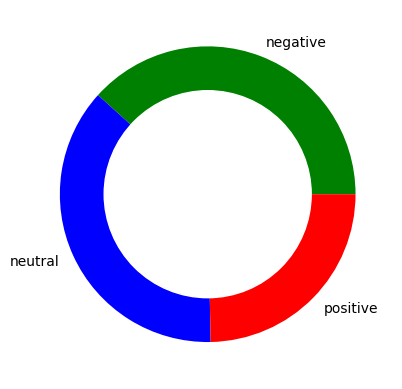

In [74]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [75]:
#Calculating tweet's length and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [76]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,108.89
neutral,94.68
positive,107.44


In [77]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,17.24
neutral,14.73
positive,17.14


In [78]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [79]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [80]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nagen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [81]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [82]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [83]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [84]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,Oral antivirals and monoclonal antibody treatm...,oral antivirals and monoclonal antibody treatm...,0.40,0.400000,positive,0.000,0.856,0.144,0.4019,118,17,oral antivirals and monoclonal antibody treatm...,"[oral, antivirals, and, monoclonal, antibody, ...","[oral, antivirals, monoclonal, antibody, treat...","[oral, antivir, monoclon, antibodi, treatment,..."
1,RT @DukeStateGovRel: Instead of coming into th...,instead of coming into the hospital for treat...,0.00,0.000000,positive,0.000,0.887,0.113,0.3182,119,19,instead of coming into the hospital for treat...,"[, instead, of, coming, into, the, hospital, f...","[, instead, coming, hospital, treatment, eligi...","[, instead, come, hospit, treatment, elig, pat..."
2,High risk for COVID &amp; monoclonal antibody ...,high risk for covid amp monoclonal antibody ...,0.08,0.303333,negative,0.130,0.870,0.000,-0.2732,108,17,high risk for covid amp monoclonal antibody ...,"[high, risk, for, covid, amp, monoclonal, anti...","[high, risk, covid, amp, monoclonal, antibody,...","[high, risk, covid, amp, monoclon, antibodi, t..."
3,@SarahAshtonLV @NVGOP @joeygilbertinc To clari...,to clarify those initial monoclonal ant...,0.00,0.000000,negative,0.158,0.842,0.000,-0.1280,86,10,to clarify those initial monoclonal ant...,"[, to, clarify, those, initial, monoclonal, an...","[, clarify, initial, monoclonal, antibody, tre...","[, clarifi, initi, monoclon, antibodi, treatme..."
4,DeSantis didn't tell the full story about evid...,desantis didn t tell the full story about evid...,0.35,0.550000,neutral,0.000,1.000,0.000,0.0000,115,19,desantis didn t tell the full story about evid...,"[desantis, didn, t, tell, the, full, story, ab...","[desantis, tell, full, story, evidence, fda, m...","[desanti, tell, full, stori, evid, fda, move, ..."


In [85]:
#Appliyng Count vectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

1078 Number of reviews has 1766 words


In [86]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,abc,abl,abo,abort,abrupt,abruptli,absolut,abus,acc,...,yeah,year,yesterday,yet,yo,york,young,zero,zinc,zulassung
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
treatment,611
monoclon,593
antibodi,586
covid,577
fda,251
florida,162
use,118
desanti,114
regeneron,100
get,87


In [88]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [89]:
#n2_bigram -------- Key discussion topics
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('monoclonal antibody', 511),
 ('antibody treatment', 247),
 ('covid 19', 153),
 ('antibody treatments', 83),
 ('covid treatment', 83),
 ('treatment sites', 59),
 ('treatment covid', 44),
 ('sites fda', 44),
 ('regeneron monoclonal', 40),
 ('eli lilly', 38),
 ('antibody covid', 34),
 ('florida closes', 33),
 ('monoclonal antibodies', 32),
 ('antibody drugs', 32),
 ('fda halts', 31),
 ('halts use', 31),
 ('fda revokes', 31),
 ('regeneron eli', 30),
 ('closes covid', 28),
 ('ron desantis', 27)]

In [90]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('monoclonal antibody treatment', 242),
 ('monoclonal antibody treatments', 75),
 ('regeneron monoclonal antibody', 40),
 ('treatment sites fda', 38),
 ('monoclonal antibody covid', 34),
 ('fda halts use', 31),
 ('covid treatment sites', 31),
 ('sites fda revokes', 30),
 ('regeneron eli lilly', 29),
 ('antibody covid treatment', 28),
 ('florida closes covid', 28),
 ('closes covid treatment', 28),
 ('antibody treatment sites', 27),
 ('fda revokes monoclonal', 27),
 ('revokes monoclonal antibody', 27),
 ('monoclonal antibody authorization', 27),
 ('halts use regeneron', 25),
 ('use regeneron monoclonal', 25),
 ('covid treatment desantis', 25),
 ('treatment desantis says', 24)]

In [94]:
dfItem.columns

Index(['created_at', 'id', 'id_str', 'text', 'display_text_range', 'source',
       'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'extended_tweet', 'quote_count',
       'reply_count', 'retweet_count', 'favorite_count', 'entities',
       'favorited', 'retweeted', 'possibly_sensitive', 'filter_level', 'lang',
       'matching_rules', 'retweeted_status', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status', 'quoted_status_permalink',
       'extended_entities'],
      dtype='object')

In [106]:
my_list_of_dicts = []
for each_json_tweet in tweet_rows:
    my_list_of_dicts.append(each_json_tweet._json)

In [107]:
with open('tweet_covid_mono_treatment.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [112]:
my_demo_list = []
with open('tweet_covid_mono_treatment.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        text = each_dictionary['text']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        user=each_dictionary['user']
        geo=each_dictionary['geo']
        place=each_dictionary['place']
        my_demo_list.append({'tweet_id': str(tweet_id),
                             'text': str(text),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                             'user' : str(user),
                             'geo' : geo,
                             'place' : str(place)
                             'description' : str(description)
                            })
       
        tweet_json = pd.DataFrame(my_demo_list, columns = 
                                  ['tweet_id', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at','user','geo','place','description'])

SyntaxError: invalid syntax (Temp/ipykernel_11716/2397994223.py, line 21)

In [114]:
tweets_json_1=tweet_json['user'].str.split(',', expand=True) 

In [115]:
tweets_json_1

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,{'id': 23711785,'id_str': '23711785','name': 'Mass. Public Health','screen_name': 'MassDPH','location': 'Boston,MA','url': 'http://www.mass.gov/dph','description': 'Tweeting from the Massachuset...,'translator_type': 'none','protected': False,...,None,None,None,None,None,None,None,None,None,None
1,{'id': 18844088,'id_str': '18844088','name': 'Showboat7','screen_name': 'Showboat7','location': None,'url': None,"'description': ""Working for Clean Water. Wor...",'translator_type': 'none','protected': False,'verified': False,...,None,None,None,None,None,None,None,None,None,None
2,{'id': 1044937263489134592,'id_str': '1044937263489134592','name': 'stefano68','screen_name': 'stefano688','location': 'Rome,Lazio','url': None,'description': None,'translator_type': 'none','protected': False,...,None,None,None,None,None,None,None,None,None,None
3,{'id': 1322976370138505218,'id_str': '1322976370138505218','name': 'BezierCurve','screen_name': 'BezierPentool','location': 'The Present','url': None,'description': '“Courage is not the absence o...,but rather the assessment that something else...,'translator_type': 'none','protected': False,...,None,None,None,None,None,None,None,None,None,None
4,{'id': 29792625,'id_str': '29792625','name': 'D-REK','screen_name': 'DJDREK84','location': 'Brunswick,Georgia,USA','url': 'http://derekcanas.com','description': '#DJ/#Author award winning #Ai...,'translator_type': 'none',...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,{'id': 3345626650,'id_str': '3345626650','name': 'Danielle says I stan for voting rights','screen_name': 'DemInRedOK','location': 'Oklahoma,USA','url': 'http://vote.org','description': 'She/her RTs and Tweets≠endors...,'translator_type': 'none','protected': False,...,None,None,None,None,None,None,None,None,None,None
2496,{'id': 817867668623597568,'id_str': '817867668623597568','name': '@Floridaisfreedom','screen_name': 'mrandmrsnaples','location': 'USA','url': None,'description': None,'translator_type': 'none','protected': False,'verified': False,...,None,None,None,None,None,None,None,None,None,None
2497,{'id': 1255070696549613568,'id_str': '1255070696549613568','name': '✌🇺🇲LemStraw🇺🇲✌','screen_name': 'LemStraw','location': None,'url': None,'description': 'Each of us can make a differe...,'translator_type': 'none','protected': False,'verified': False,...,None,None,None,None,None,None,None,None,None,None
2498,{'id': 102102479,'id_str': '102102479','name': 'Francine Polsky','screen_name': 'careaware','location': 'Indiana blue','url': None,"'description': ""🇺🇸✡😎 G'ma of 3. M.A. Retired ...",'translator_type': 'none','protected': False,'verified': False,...,None,None,None,None,None,None,None,None,None,None


In [118]:
tweets_json_2=tweets_json_1[4].str.split(':',expand=True)

In [124]:
#counts by location
tweets_json_2[1].value_counts()

 None                967
 'United States'      67
 'Florida             53
 'USA'                31
 'Washington          26
                    ... 
 'South Carolina'      1
 'Watkinsville '       1
 ' U.S.A'              1
 'Hobart               1
 'Left of Center'      1
Name: 1, Length: 841, dtype: int64